## Import Necessary Libraries

In [2]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('datasets/Crop_recommendation.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## EDA

In [4]:
df.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]

In [5]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


- Variable names are changed so that dataset can be more easily compreheneded by anyone

In [6]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


- This describes the various statistics for each variable of the dataset.

- For example, the mean of the temperature is 48.14(2dp), the minimum temperature is 14.25(2dp) and the maximum temperature is 43.68(2dp).

In [7]:
dfnumeric = pd.DataFrame(df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature','Humidity','pH','Rainfall']])
dfnumeric.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


- This code is to bring out the numeric variables.

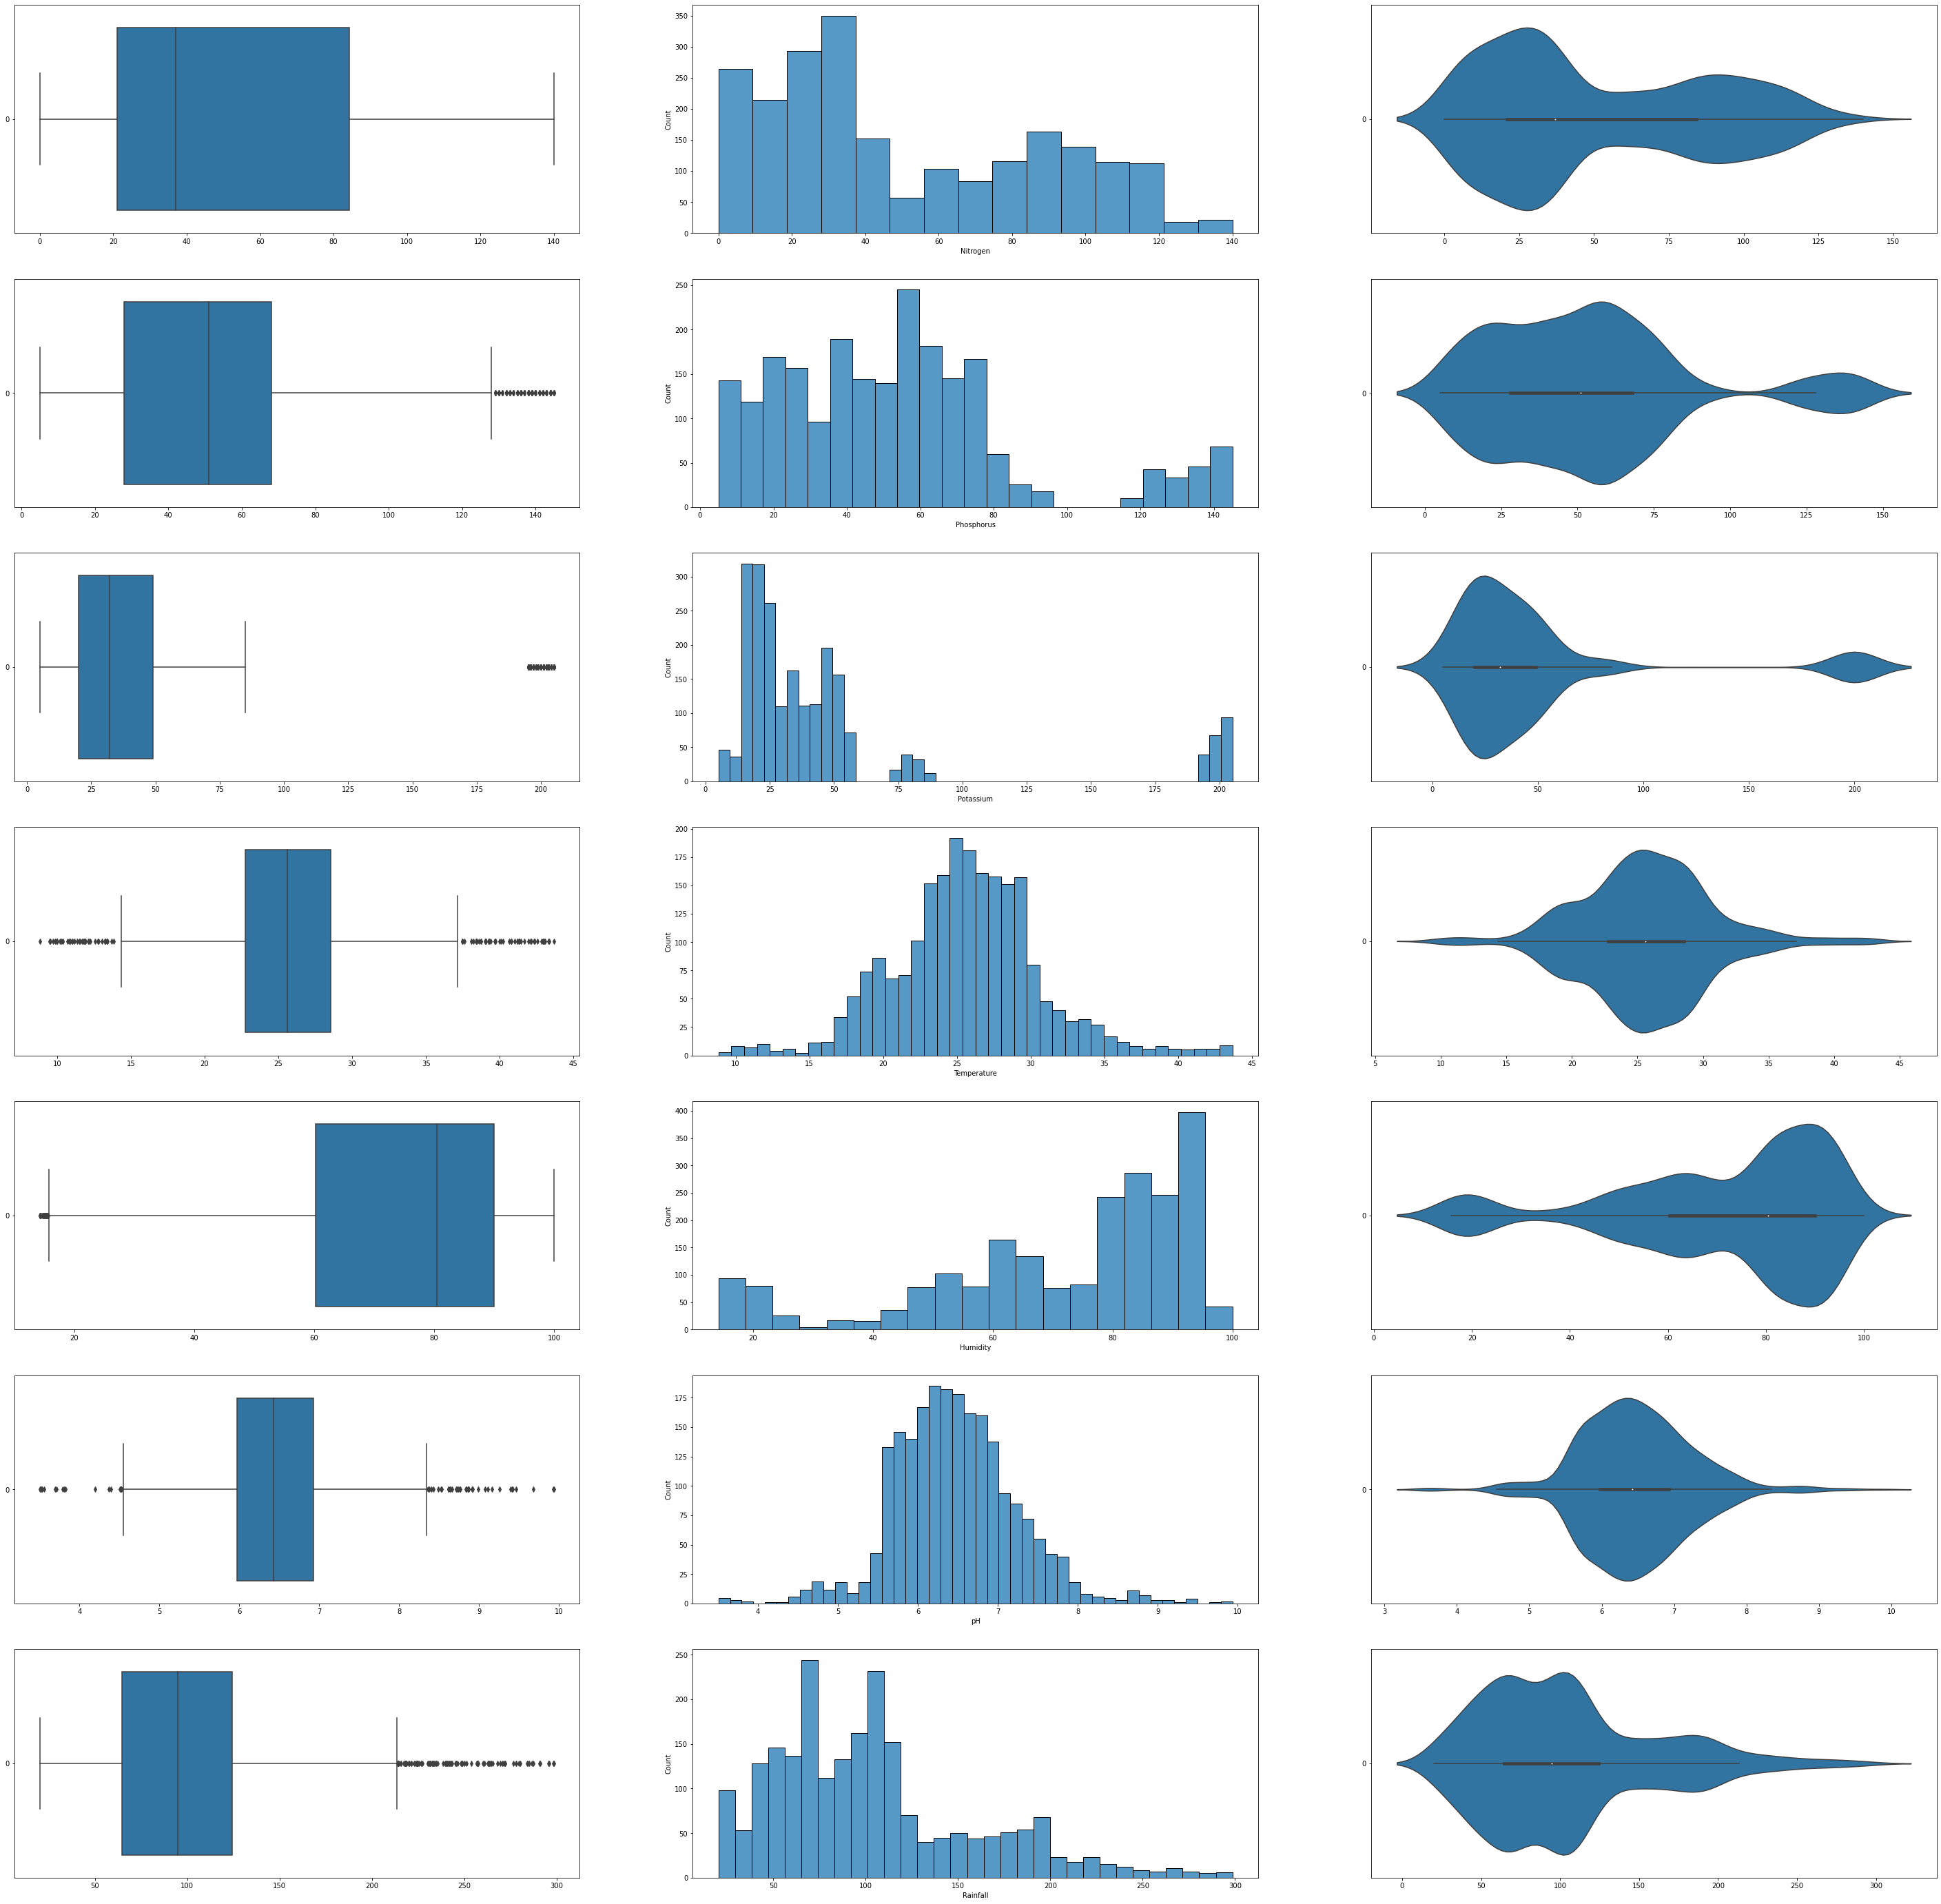

In [8]:
f, axes = plt.subplots(7, 3, figsize=(50, 50))

count = 0
for var in dfnumeric:
    sb.boxplot(data = dfnumeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = dfnumeric[var], ax = axes[count,1])
    sb.violinplot(data = dfnumeric[var], orient = "h", ax = axes[count,2])
    count += 1

- This is the visualisation of the each variable in 3 types of plots ( boxplot, histogram and a violin plot).

#### Find the number of outliers in each type of crop. 

In [9]:
# Group the crop data in groups of 100 rows
groupCrops = [dfnumeric[i:i+100] for i in range(0, len(dfnumeric), 100)]

# Find outliers using the IQR method for each group
outliers = pd.DataFrame()
for crop in groupCrops:
    q1 = crop.quantile(0.25)
    q3 = crop.quantile(0.75)
    iqr = q3 - q1
    individualCrop_outliers = crop[((crop < (q1 - 1.5 * iqr)) | (crop > (q3 + 1.5 * iqr))).any(axis=1)]
    outliers = pd.concat([outliers, individualCrop_outliers])

# Print the outliers 
outliers

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall


- The resultant table show no outliers



In [10]:
dfcategorical  = pd.DataFrame(df["Crop"])
dfcategorical

,Crop
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [11]:
dfcategorical.nunique()

Crop    22
dtype: int64

- This code shows the number of labels (the different types of crops) used in the data set

In [12]:
print("Number of various crops: ", len(dfcategorical['Crop'].unique()))
print("List of crops: ", dfcategorical['Crop'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


- This code shows the different types of crops used in this dataset

In [13]:
dfcategorical.value_counts()

Crop       
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64

- This code shows the number of elements in each label. In this case, all the labels have 100 elements.

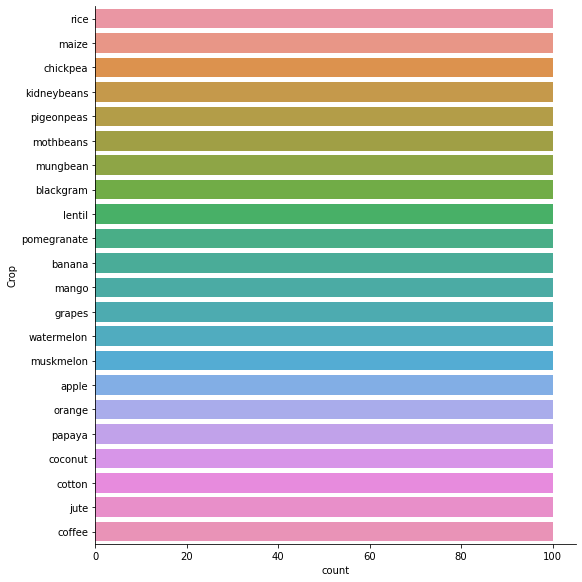

In [14]:
sb.catplot(y = 'Crop', data = dfcategorical, kind = "count", height = 8)

- This code shows categorical plot of the variable 'label'. It is just a continuation of the previous code, showing that there are equal number of elements.

<AxesSubplot:>

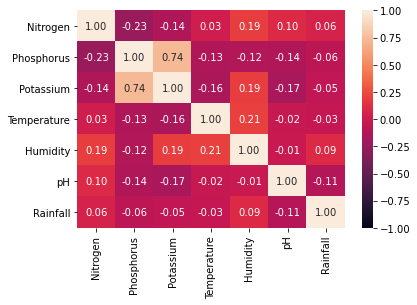

In [15]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From this heatmap, we can infer that for the whole dataset, 'Phosphorus' and 'Potassium' has the highest correlation of +0.74.

## Comparing crops against climate features

<AxesSubplot:xlabel='Potassium', ylabel='Crop'>

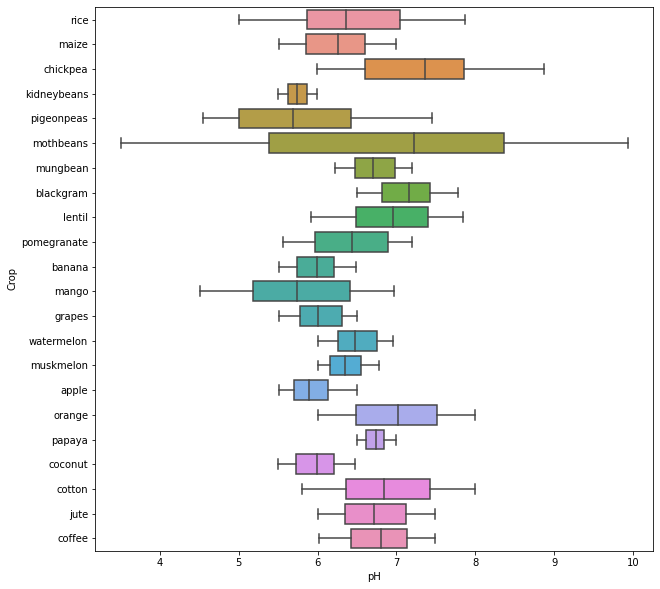

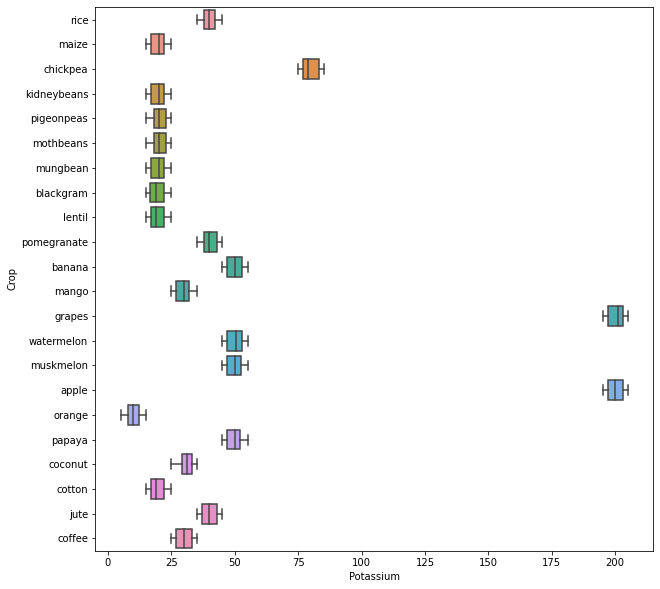

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='pH',data=df)


fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Potassium',data=df)

This boxplot shows the distribution of each crop across different pH and K values

<AxesSubplot:xlabel='Phosphorus', ylabel='Crop'>

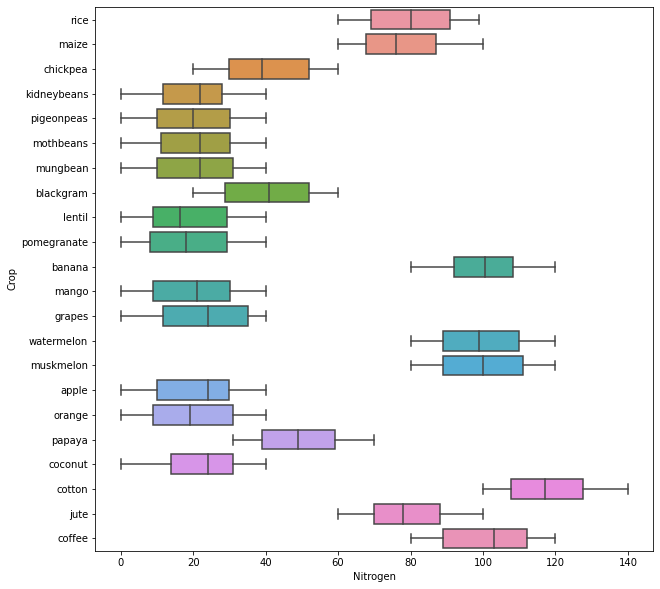

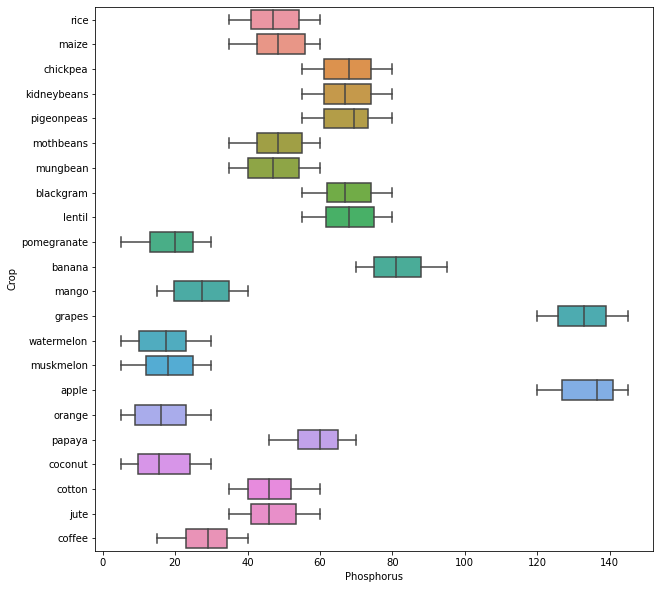

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Nitrogen',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Phosphorus',data=df)


- This boxplot shows the distribution of each crop across different N and P values

<AxesSubplot:xlabel='Humidity', ylabel='Crop'>

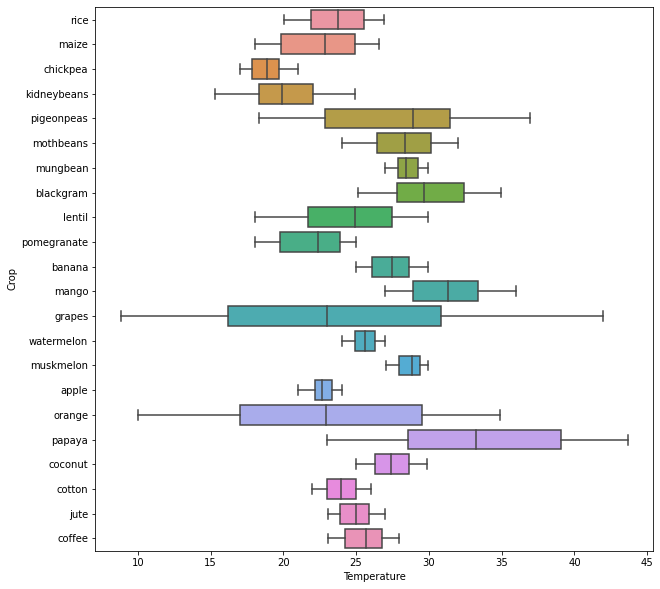

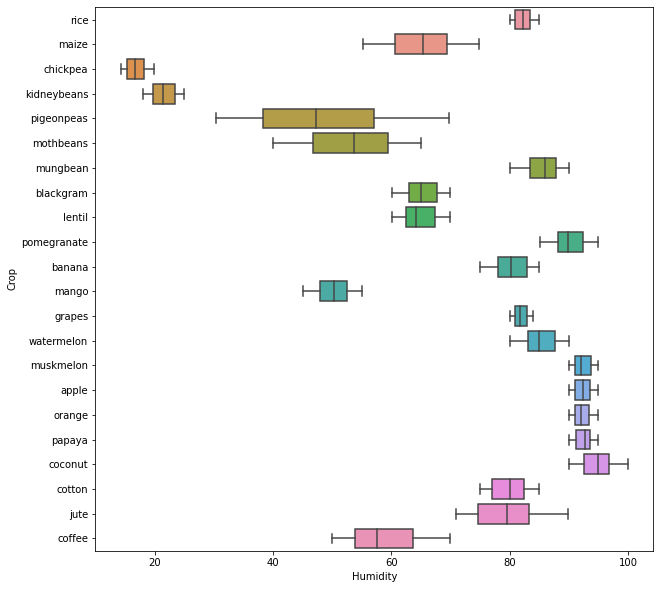

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Temperature',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Humidity',data=df)


- This boxplot shows the distribution of each crop across different temperature and humidity values

<AxesSubplot:xlabel='Rainfall', ylabel='Crop'>

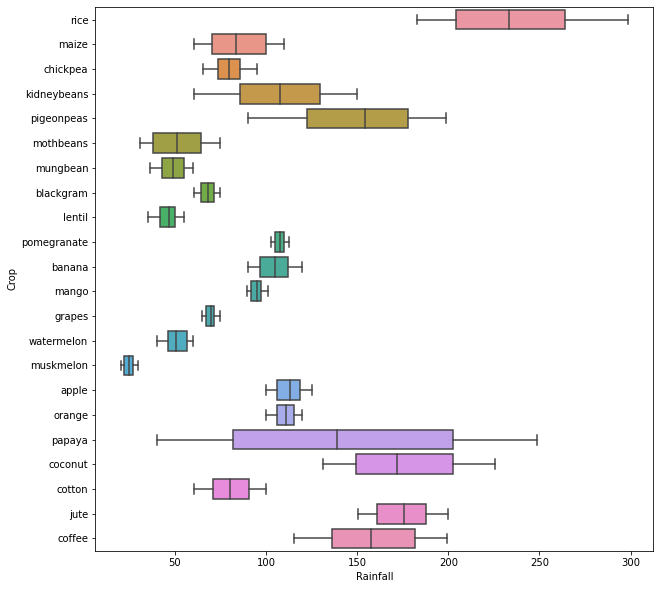

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Rainfall',data=df)



- This boxplot shows the distribution of each crop across different rainfall values

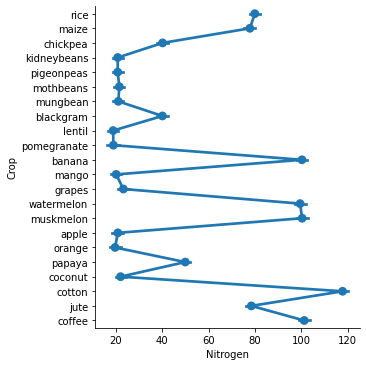

In [20]:
sb.catplot(x='Nitrogen', y='Crop', 
            data=df,
            kind='point')

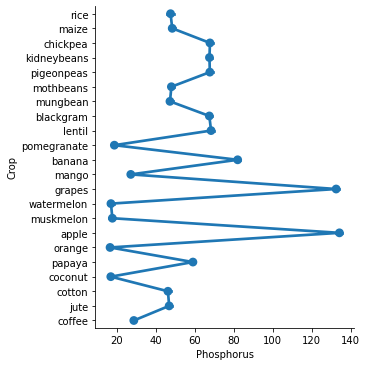

In [21]:
sb.catplot(x='Phosphorus', y='Crop', 
            data=df,
            kind='point')

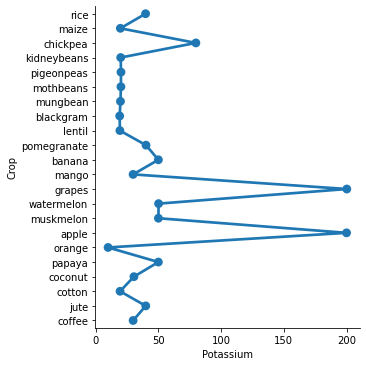

In [22]:

sb.catplot(x='Potassium', y='Crop', 
            data=df,
            kind='point')

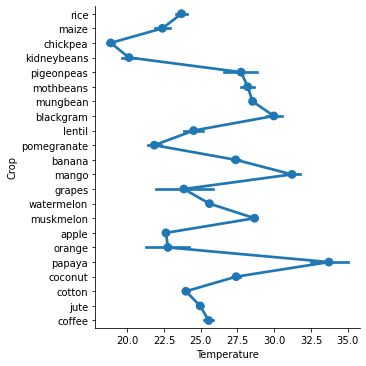

In [23]:
sb.catplot(x='Temperature', y='Crop', 
            data=df,
            kind='point')

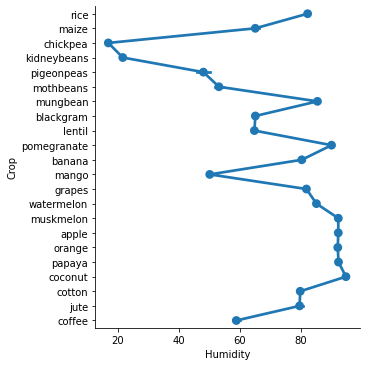

In [24]:
sb.catplot(x='Humidity', y='Crop', 
            data=df,
            kind='point')

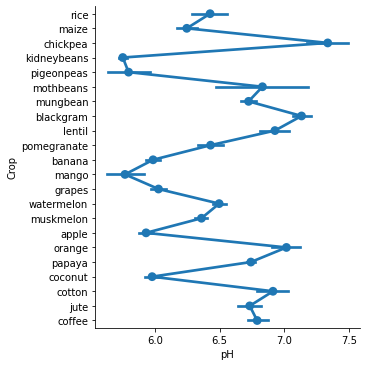

In [25]:
sb.catplot(x='pH', y='Crop', 
            data=df,
            kind='point')

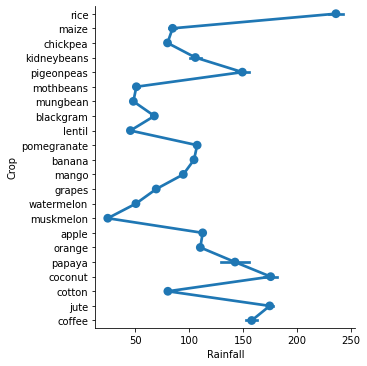

In [26]:
sb.catplot(x='Rainfall', y='Crop', 
            data=df,
            kind='point')

# Machine Learning and Creation of Crop Recommendation System

In this portion we will perform machine learning analysis and store the learnt model.

The problem we are facing is a classification problem. Most of the analysis and models we use, will be classification models. (Exception will be linear regression, to show what happens if a wrong model is used)

We will perform the following:

1. Anomaly detection (previously done, no outliers detected)
2. Data Cleaning
3. Seperation of test and train set
4. Perform Model Training 
    1. Single Decision Tree
    2. Random Forest
    3. Neural Network
    4. Support Vector Machine
    5. Logistical Regression
    6. Linear Regresstion (to show error)
5. Cross validation analysis of each model
6. If Cross Validation is valid, then we store the trained model
7. Compare the accuracy of each model
8. Create a crop recommendation system



### Import Libraries

In [41]:
# Library for ML stuff
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, f1_score, r2_score
from sklearn.preprocessing import LabelEncoder

# To help split into test and trainset much easily
from sklearn.model_selection import train_test_split

# Import Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Cross validation
from sklearn.model_selection import cross_val_score




### Clean Data and split into train & test set

Now, we will have to split our data, into the feature (variables which cause change) and target (dependent variable ie what we are trying to predict).

<b>Data Split:</b>  70% train, 30% test

<b>Stratify:</b>  Ensures that for training set, 70% will always be taken for each type of crop, rather than 70% of whole dataset.

<b>random_state:</b> Randomise the selection of 70/30. (we chose 32, so we can reproduce results if random state of 32 is chosen again in another function alter)

In [42]:
features = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall']]
target = df['Crop']
labels = df['Crop']

# Split into Test set and Train set. 70% Train, 30% Test.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3, stratify= target, random_state = 32)

In [43]:
# Create Array to store model name and accuracy for use later
modelAccuracy = []
modelf1 = []
modelCrossValidation = []
modelName = []

# Single Decision Tree

In [44]:
# create instance of DecisionTreeClassifier
# Set max depth to 6 to prevent an issue of "overfitting"
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=8)

# fit the model to the training data
DecisionTree.fit(Xtrain,Ytrain)

# use the trained model to predict the classes of the test data
Ypred = DecisionTree.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of Random Forest model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Calculate f1-score
f1 = f1_score(Ytest, Ypred, average='weighted')

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score.mean()

# Store Results
modelName.append('Decision Tree')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(f1)

# print
print("f1: ", f1)
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of Random Forest model: 97.73%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.93      0.95        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       0.97      1.00      0.98        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.70      0.82        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.90      0.95        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.91      1.00      0.95        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.

### Saving of Model

In [45]:
import pickle
import os

# subdir
subdir = 'model'

# Create the subdirectory if it does not exist
if not os.path.exists(subdir):
    os.makedirs(subdir)

# Define the file path with the subdirectory name
DT_pkl_filename = os.path.join(subdir, 'DecisionTree.pkl')

# Dump the trained Decision Tree classifier with Pickle
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

# RandomForest

Using multiple decision trees to analyse

In [46]:
# create instance of RandomForestClassifier
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
RandomForestModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = RandomForestModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of Random Forest model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Calculate f1-score
f1 = f1_score(Ytest, Ypred, average='weighted')

# Cross validation score (Random Forest)
score = cross_val_score(RandomForestModel,features,target,cv=5)
score.mean()

# Store Results
modelName.append('Random Forest')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(f1)

# print
print("f1: ", f1)
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of Random Forest model: 99.24%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.93      0.93      0.93        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.98        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.97      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.

### Save the model

In [47]:
# Define the file path with the subdirectory name
RF_pkl_filename = os.path.join(subdir, 'RandomForest.pkl')

# Dump the trained Random Forest classifier with Pickle
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForestModel, RF_Model_pkl)
RF_Model_pkl.close()

# Neural Network (multilayer perceptron)

In [48]:
# create instance of MLPClassifier
NeuralNetworkModel = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state = 2)

# fit the model to the training data
NeuralNetworkModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = NeuralNetworkModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of MLP Neural Network model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Calculate f1-score
f1 = f1_score(Ytest, Ypred, average='weighted')

# Cross validation score (Neural Network)
score = cross_val_score(NeuralNetworkModel,features,target,cv=5)
score.mean()

# Store Results
modelName.append('MLP Neural Network')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(f1)

# print
print("f1: ", f1)
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of MLP Neural Network model: 97.12%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.93      0.93      0.93        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.87      0.90      0.89        30
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.96      0.90      0.93        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.84      0.87      0.85        30
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00   

### save model

In [49]:
# Define the file path with the subdirectory name
NN_pkl_filename = os.path.join(subdir, 'MLPNeuralNetwork.pkl')

# Dump the trained Neural Network classifier with Pickle
NN_Model_pkl = open(NN_pkl_filename, 'wb')
pickle.dump(NeuralNetworkModel, NN_Model_pkl)
NN_Model_pkl.close()

# SVM Support Vector Machine

In [50]:
# create instance of SVM with linear kernel
# Set C to a 'small value' to prevent over fitting.
SVMModel = SVC(kernel='rbf', random_state=42, gamma="scale", C=0.1)

# fit the model to the training data
SVMModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = SVMModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of SVM model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Calculate f1-score
f1 = f1_score(Ytest, Ypred, average='weighted')

# Cross validation score (Neural Network)
score = cross_val_score(SVMModel,features,target,cv=5)
score.mean()

# Store Results
modelName.append('Support Vector Machine')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(f1)

# print
print("f1: ", f1)
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of SVM model: 92.27%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.82      0.90      0.86        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      0.87      0.93        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.70      1.00      0.82        30
 kidneybeans       0.88      0.93      0.90        30
      lentil       0.75      1.00      0.86        30
       maize       0.97      0.97      0.97        30
       mango       0.97      1.00      0.98        30
   mothbeans       1.00      0.70      0.82        30
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        30
      orange       0.97      1.00      0.98        

### Saving Model

In [51]:
# Define the file path with the subdirectory name
SVM_pkl_filename = os.path.join(subdir, 'SVMModel.pkl')

# Dump the trained Neural Network classifier with Pickle
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVMModel, SVM_Model_pkl)
SVM_Model_pkl.close()

# Logistical Regression

In [52]:
# Initialize logistic regression model
# Other availible solvers: 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
# max_iter=1000
logregModel = LogisticRegression(solver='liblinear')

# Train the model on the training set
logregModel.fit(Xtrain, Ytrain)

# Make predictions on the test set
Ypred = logregModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of SVM model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Calculate f1-score
f1 = f1_score(Ytest, Ypred, average='weighted')

# Cross validation score (Logistical Regression)
score = cross_val_score(logregModel,features,target,cv=5)
score.mean()

# Store Results
modelName.append('Logistical Regression')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(f1)

# print
print("f1: ", f1)
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of SVM model: 94.70%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.94      1.00      0.97        30
   blackgram       0.82      0.90      0.86        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.91      1.00      0.95        30
      grapes       1.00      1.00      1.00        30
        jute       0.92      0.73      0.81        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.92      0.77      0.84        30
       maize       0.96      0.83      0.89        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.83      0.80      0.81        30
    mungbean       0.91      1.00      0.95        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        

### Saving Model

In [53]:
# Define the file path with the subdirectory name
LogReg_pkl_filename = os.path.join(subdir, 'LogisticalRegressionModel.pkl')

# Dump the trained Neural Network classifier with Pickle
LogReg_Model_pkl = open(LogReg_pkl_filename, 'wb')
pickle.dump(logregModel, LogReg_Model_pkl)
LogReg_Model_pkl.close()

# Multivariate Linear Regression

As multivariate linear regression is usually performed on numeric datasets, we need to convert the labels (crops) into numeric data

In [54]:
### Proecssing the data for linear regression analysis ###

le = LabelEncoder()
targetLinearReg = le.fit_transform(target)

X_Linear_train, X_Linear_test, Y_Linear_train, Y_Linear_test = train_test_split(features, targetLinearReg, test_size=0.3, stratify= targetLinearReg, random_state=32)

### Linear Regression analysis begins here ###

# Using Training data, fit into the model
LinearReg = LinearRegression()
LinearReg.fit(X_Linear_train,Y_Linear_train)

# Make predictions on the test data
Y_pred = LinearReg.predict(X_Linear_test)

# Score
accuracy = r2_score(Y_Linear_test, Y_pred)
print("Accuracy of the model (R^2): {:.2f}%".format(accuracy*100))


# Cross validation score (Multivarite Regression Model)
score = cross_val_score(LinearReg, features, targetLinearReg, cv=5)
score.mean()

# Store Results
modelName.append('Linear regression')
modelCrossValidation.append(score.mean())
modelAccuracy.append(accuracy)
modelf1.append(0)

# print
print("Accuracy: ", accuracy)
print("Cross Validation: " , score.mean())

Accuracy of the model (R^2): 28.63%
Accuracy:  0.28627043024742893
Cross Validation:  -1.9724625987637687


This hugely negative value of Cross validation and Poor accuracy simply show us that the ML model is wrong. 

# Comparison of ML Models

We are Going to compare using 3 metrics:

1. Model Accuracy
2. f1 value
3. Cross Validation Value

Model Name                   Accuracy     F1-score     Cross Validation
------------------------------------------------------------------------
Decision Tree                97.73%       97.65%       0.98%
Random Forest                99.24%       99.24%       0.99%
MLP Neural Network           97.12%       97.13%       0.97%
Support Vector Machine       92.27%       91.83%       0.93%
Logistical Regression        94.70%       94.65%       0.95%
Linear regression            28.63%       0.00%        -1.97%


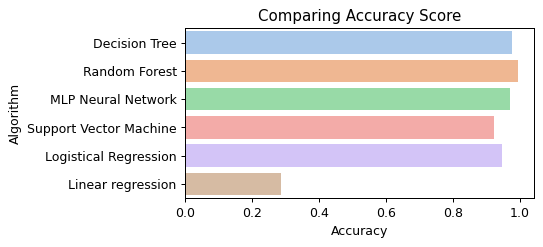

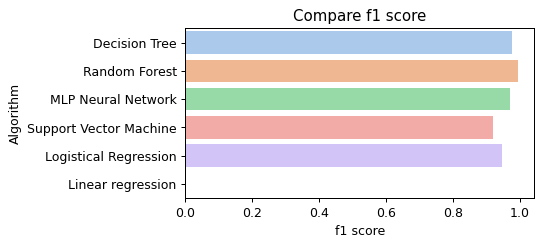

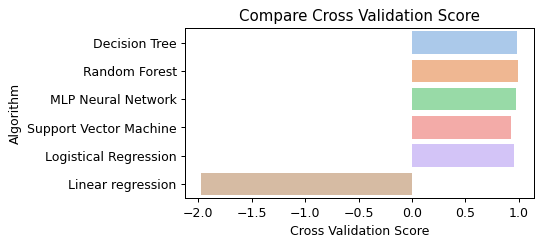

In [55]:
import seaborn as sns

# Plot for Model Accuracy
plt.figure(figsize=[5,2.5],dpi = 90)
plt.title('Comparing Accuracy Score')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = modelAccuracy,y = modelName,palette='pastel')

# Plot for f1 value
plt.figure(figsize=[5,2.5],dpi = 90)
plt.title('Compare f1 score')
plt.xlabel('f1 score')
plt.ylabel('Algorithm')
sns.barplot(x = modelf1,y = modelName,palette='pastel')

# Plot for Cross Validation Value
plt.figure(figsize=[5,2.5],dpi = 90)
plt.title('Compare Cross Validation Score')
plt.xlabel('Cross Validation Score')
plt.ylabel('Algorithm')
sns.barplot(x = modelCrossValidation, y = modelName,palette='pastel')

# Print Table for Comparison
print("{:<28} {:<12} {:<12} {}".format("Model Name", "Accuracy", "F1-score", "Cross Validation"))
print("-" * 72)

for i in range(len(modelName)):
    print("{:<28} {:<12.2%} {:<12.2%} {:<.2f}%".format(modelName[i], modelAccuracy[i], modelf1[i], modelCrossValidation[i]))


### Observations, 

<b>Random Forest:</b> is the "best model" to use as it has the highest f1, accuracy and cross validation score

<b>Linear regression</b> is totally off because this is a classification problem, using linear regression will have no relationship

### Further analysis of Random Forest using Feature importance

We have selected Random Forest to be the best model, now we are going to do a feature importance analysis

Feature Importance Table:
        Feature  Importance
6     Rainfall    0.230157
4     Humidity    0.214031
2    Potassium    0.171637
1   Phosphorus    0.146737
0     Nitrogen    0.102874
3  Temperature    0.079279
5           pH    0.055286


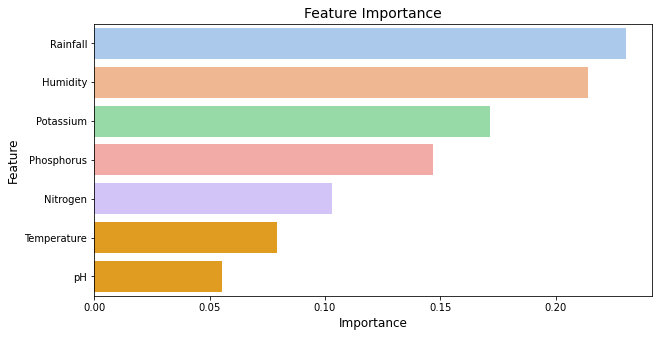

In [56]:
# plot feature importance
importances = RandomForestModel.feature_importances_
features = list(Xtrain.columns)
feature_importance_table = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_table = feature_importance_table.sort_values('Importance', ascending=False)
print('Feature Importance Table:\n', feature_importance_table)

colors = sns.color_palette("pastel", len(feature_importance_table))
colors = ['orange' if importance < 0.1 else colors[i] for i, importance in enumerate(feature_importance_table['Importance'])]
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_table, palette=colors)
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## Observations and analysis

Based on observations, Rainfall, Humidity, Potassium, Phosphorus and Nitrogen content are the more significant factors affecting the prediction of type of crop. When using Random Forest


# Predicting best crop to grow


In this section, we will predict the best crop to grow using Random Forest ML model.

1. We first write a function to predict best crop, given the 7 features: Rainfall, Humidity, Temperature, Ph, P,K,N, 
2. Next we create a GUI for easier use

In [57]:
# Create Function:

def predict_best_crop(new_data):
    # Load the saved Random Forest classifier
    subdirectory = "model"
    RF_pkl_filename = subdirectory + "/RandomForest.pkl"
    with open(RF_pkl_filename, 'rb') as file:
        RandomForestModel = pickle.load(file)

    # Make predictions on the new data
    prediction_probabilities = RandomForestModel.predict_proba(new_data)

    # Print the predicted values and their probabilities
    print("{:<20} {}".format("Crop Type", "Probability"))
    print("-" * 44)
    
    for i, prediction in enumerate(RandomForestModel.classes_):
        if prediction_probabilities[0][i] > 0:

            print("Class {:<15}: {:.2%}".format(prediction, prediction_probabilities[0][i]))

    # Get the index of the highest probability
    best_crop_index = np.argmax(prediction_probabilities)

    # Get the name and probability of the best crop
    best_crop = RandomForestModel.classes_[best_crop_index]
    best_crop_probability = prediction_probabilities[0][best_crop_index]

    # Store the best crop and its probability in an array
    best_crop_info = [best_crop, best_crop_probability]

    print("\nRecommended Crop to grow: {} ({:.2%} probability)".format(best_crop_info[0], best_crop_info[1]))
    return tuple(best_crop_info)
    



In [58]:
# Driver
new_data = np.array([[50, 28, 30, 30,36, 6.7, 140.91]])
predict_best_crop(new_data)

Crop Type            Probability
--------------------------------------------
Class blackgram      : 1.00%
Class coconut        : 14.00%
Class coffee         : 16.00%
Class jute           : 1.00%
Class mango          : 52.00%
Class mothbeans      : 1.00%
Class orange         : 2.00%
Class papaya         : 3.00%
Class pigeonpeas     : 9.00%
Class pomegranate    : 1.00%

Recommended Crop to grow: mango (52.00% probability)


('mango', 0.52)

# Sample GUI

In [ ]:
import tkinter as tk

# create a new window
window = tk.Tk()


# set the window title
window.title("Crop Yield Prediction")


# add a header label
header_label = tk.Label(window, text="Crop Yield Prediction", font=("Arial", 18))
header_label.grid(row=0, column=0, columnspan=2, padx=5, pady=5)


# define the function that will be called when the user clicks the "Predict" button
def predict_yield():
    # get the user input for each of the features
    temperature = float(temperature_entry.get())
    humidity = float(humidity_entry.get())
    ph = float(ph_entry.get())
    rainfall = float(rainfall_entry.get())
    nitrogen = float(nitrogen_entry.get())
    phosphorus = float(phosphorus_entry.get())
    potassium = float(potassium_entry.get())
    
    input_data = np.array([[nitrogen, phosphorus, potassium ,temperature, humidity, ph, rainfall,]])

    # perform the prediction using the trained model
    prediction, probability = predict_best_crop(input_data)

    # display the prediction and probability in the output label
    output_label.config(text="Predicted crop: {}\nProbability: {:.2f}%".format(prediction, probability * 100))

# create labels for each of the features
label_font = ('Helvetica', 10, 'bold')
label_color = '#2C3E50'

temperature_label = tk.Label(window, text="Temperature (°C):", font=label_font, fg=label_color)
humidity_label = tk.Label(window, text="Humidity (%):", font=label_font, fg=label_color)
ph_label = tk.Label(window, text="pH:", font=label_font, fg=label_color)
rainfall_label = tk.Label(window, text="Rainfall (mm):", font=label_font, fg=label_color)
nitrogen_label = tk.Label(window, text="Nitrogen (ppm):", font=label_font, fg=label_color)
phosphorus_label = tk.Label(window, text="Phosphorus (ppm):", font=label_font, fg=label_color)
potassium_label = tk.Label(window, text="Potassium (ppm):", font=label_font, fg=label_color)


# create entry boxes for each of the features
entry_font = ('Helvetica', 10)
entry_width = 10
entry_bg = '#ECF0F1'

temperature_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
humidity_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
ph_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
rainfall_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
nitrogen_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
phosphorus_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)
potassium_entry = tk.Entry(window, font=entry_font, width=entry_width, bg=entry_bg)

# create a button to trigger the prediction
button_font = ('Helvetica', 12, 'bold')
button_bg = '#3498DB'
button_fg = 'white'
predict_button = tk.Button(window, text="Predict", font=button_font, bg=button_bg, fg=button_fg, command=predict_yield)

# create a label to display the prediction output
output_label = tk.Label(window, font=("Arial", 12, "bold"), fg="#2C3E50")

# lay out the GUI components using the grid layout manager
temperature_label.grid(row=2, column=0, padx=10, pady=10)
temperature_entry.grid(row=2, column=1, padx=10, pady=10)

humidity_label.grid(row=3, column=0, padx=10, pady=10)
humidity_entry.grid(row=3, column=1, padx=10, pady=10)

ph_label.grid(row=4, column=0, padx=10, pady=10)
ph_entry.grid(row=4, column=1, padx=10, pady=10)

rainfall_label.grid(row=5, column=0, padx=10, pady=10)
rainfall_entry.grid(row=5, column=1, padx=10, pady=10)

nitrogen_label.grid(row=6, column=0, padx=10, pady=10)
nitrogen_entry.grid(row=6, column=1, padx=10, pady=10)

phosphorus_label.grid(row=7, column=0, padx=10, pady=10)
phosphorus_entry.grid(row=7, column=1, padx=10, pady=10)

potassium_label.grid(row=8, column=0, padx=10, pady=10)
potassium_entry.grid(row=8, column=1, padx=10, pady=10)

predict_button.grid(row=9, column=0, columnspan=2,padx=10, pady=10)
output_label.grid(row=10, column=0, columnspan=2,padx=10, pady=10)

# start the GUI event loop
window.mainloop()



Crop Type            Probability
--------------------------------------------
Class apple          : 2.00%
Class banana         : 1.00%
Class blackgram      : 6.00%
Class chickpea       : 22.00%
Class coconut        : 1.00%
Class coffee         : 5.00%
Class grapes         : 7.00%
Class jute           : 1.00%
Class mango          : 16.00%
Class mothbeans      : 8.00%
Class papaya         : 13.00%
Class pigeonpeas     : 14.00%
Class pomegranate    : 2.00%
Class rice           : 2.00%

Recommended Crop to grow: chickpea (22.00% probability)
Crop Type            Probability
--------------------------------------------
Class apple          : 2.00%
Class banana         : 1.00%
Class blackgram      : 7.00%
Class chickpea       : 22.00%
Class coconut        : 1.00%
Class coffee         : 5.00%
Class grapes         : 7.00%
Class jute           : 1.00%
Class mango          : 16.00%
Class mothbeans      : 7.00%
Class papaya         : 13.00%
Class pigeonpeas     : 14.00%
Class pomegranate    : 2.